# Quickstart

<a href="https://mybinder.org/v2/gh/rostepifanov/voxelmentations/master?filepath=examples/quickstart.ipynb">
    <img src="https://mybinder.org/badge_logo.svg"  align='left'>
</a>

This notebook contains the simple examples of data transformation pipeline using Voxelmentations library.

**Table of Contents**

* [Solo transforms](#chapter1)
* [Pipelines of transfroms](#chapter2)

## 1. Solo transforms <a class="anchor" id="chapter1"></a>

In [1]:
import voxelmentations as V

import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Gridded data')

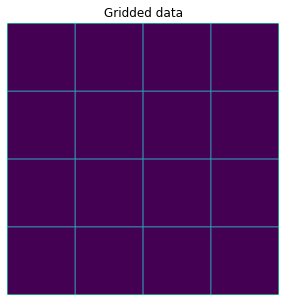

In [2]:
voxel = np.zeros((513, 513, 1, 1)) # (height, width, depth, channels) 

for idx in np.arange(0, 513, 128):
    voxel[idx] = 1
    voxel[:, idx] = 1

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.imshow(voxel[:, :, 0])
ax.axis('off')
ax.set_title('Gridded data')

### 1.1 Affine transformation in axial (x-y) plane<a class="anchor" id="section_1_1"></a>

Text(0.5, 1.0, 'Transformed data')

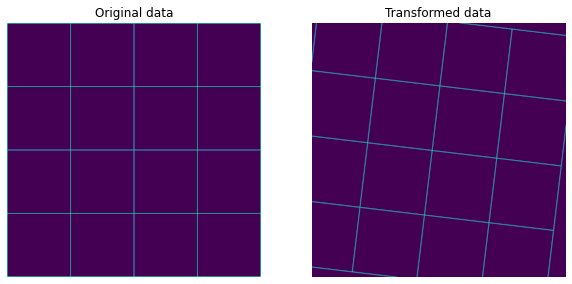

In [3]:
transform = V.AxialPlaneAffine(always_apply=True)

transformed = transform(voxel=voxel)
transformed_voxel = transformed['voxel']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(voxel[:, :, 0])
ax[0].axis('off')
ax[0].set_title('Original data')

ax[1].imshow(transformed_voxel[:, :, 0])
ax[1].axis('off')
ax[1].set_title('Transformed data')

### 1.2 Distortion by grid<a class="anchor" id="section_1_2"></a>

Text(0.5, 1.0, 'Transformed data')

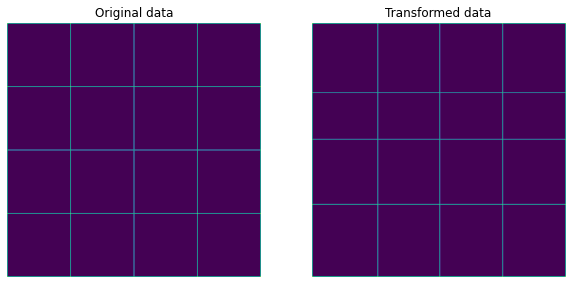

In [4]:
transform = V.GridDistort(distort_limit=0.5, always_apply=True)

transformed = transform(voxel=voxel)
transformed_voxel = transformed['voxel']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(voxel[:, :, 0])
ax[0].axis('off')
ax[0].set_title('Original data')

ax[1].imshow(transformed_voxel[:, :, 0])
ax[1].axis('off')
ax[1].set_title('Transformed data')

## 2. Pipeline from transforms <a class="anchor" id="chapter2"></a>

Text(0.5, 1.0, 'Transformed data')

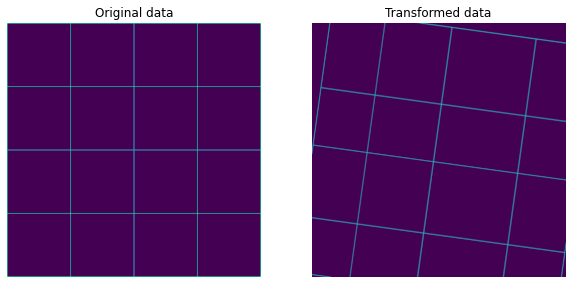

In [5]:
transform = V.Sequential([
    V.GridDistort(distort_limit=0.5, always_apply=True),
    V.AxialPlaneAffine(always_apply=True),
])

transformed = transform(voxel=voxel)
transformed_voxel = transformed['voxel']

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(voxel[:, :, 0])
ax[0].axis('off')
ax[0].set_title('Original data')

ax[1].imshow(transformed_voxel[:, :, 0])
ax[1].axis('off')
ax[1].set_title('Transformed data')